In [104]:
import tensorflow as tf
from tensorflow import keras
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import GridSearchCV

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [105]:

from keras.models import Sequential,load_model
from keras.layers import Dense,Activation,Flatten,Dropout,BatchNormalization
from keras.layers.convolutional import Conv2D,MaxPooling2D
from keras.wrappers.scikit_learn import KerasClassifier

In [ ]:
train='/content/drive/My Drive/DL_projects/dataset/training_set'
test='/content/drive/My Drive/DL_projects/dataset/test_set'

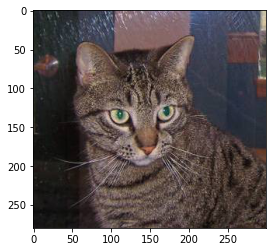

In [106]:
img = image.load_img('/content/drive/My Drive/DL_projects/dataset/training_set/cats/cat.1.jpg')
plt.imshow(img)

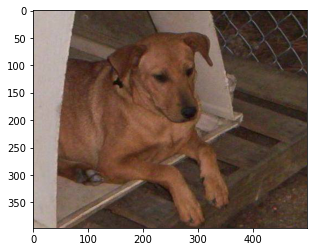

In [ ]:
img2=image.load_img('/content/drive/My Drive/DL_projects/dataset/training_set/dogs/dog.100.jpg')
plt.imshow(img2)

In [ ]:
cv2.imread('/content/drive/My Drive/DL_projects/dataset/training_set/dogs/dog.100.jpg').shape

(397, 500, 3)

In [107]:
train_data= ImageDataGenerator(rotation_range=15,
                                rescale=1./255,
                                shear_range=0.1,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                width_shift_range=0.1,
                                height_shift_range=0.1)

test_data= ImageDataGenerator(rotation_range=15,
                                rescale=1./255,
                                shear_range=0.1,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                width_shift_range=0.1,
                                height_shift_range=0.1)

In [ ]:
train_dataset = train_data.flow_from_directory("/content/drive/My Drive/DL_projects/data/training_set",
                                          target_size=(200,200),
                                          batch_size =64,
                                          class_mode = 'binary'
                                         )

Found 8000 images belonging to 2 classes.


In [108]:
train_dataset.class_indices

{'cats': 0, 'dogs': 1}

In [109]:
X, Y = train_dataset.next()

In [ ]:
X

In [110]:
test_dataset = test_data.flow_from_directory("/content/drive/My Drive/DL_projects/dataset/test_set",
                                          target_size=(200,200),
                                          batch_size =64,
                                          class_mode = 'binary'
                                         )

Found 2000 images belonging to 2 classes.


In [111]:
test_dataset.class_indices

{'cats': 0, 'dogs': 1}

In [120]:
 def create_model(optimizer='softmax',activation='sigmoid',learn_rate=0.01):
  model=Sequential()
  model.add(Conv2D(32,(5,5),activation='relu',input_shape=(200,200,3)))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2,2),strides=2))
  model.add(Dropout(0.25))

  model.add(Conv2D(64,(5,5),activation='relu',input_shape=(200,200,3)))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2,2),strides=2))
  model.add(Dropout(0.25))

  '''model.add(Conv2D(128,(5,5),activation='relu',input_shape=(200,200,3)))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2,2),strides=2))
  model.add(Dropout(0.25))
  '''
  model.add(Flatten())
  model.add(Dense(64,activation='relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.25))
  model.add(Dense(2,activation=activation))

  model.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy','mse'])
  return model

In [115]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 196, 196, 32)      2432      
_________________________________________________________________
batch_normalization_28 (Batc (None, 196, 196, 32)      128       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 98, 98, 32)        0         
_________________________________________________________________
dropout_26 (Dropout)         (None, 98, 98, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 94, 94, 64)        51264     
_________________________________________________________________
batch_normalization_29 (Batc (None, 94, 94, 64)        256       
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 47, 47, 64)       

In [121]:
# define the grid search parameters
optimizer = ['SGD', 'Adagrad', 'Adam']
batch_size = [10, 20]
epochs = [10, 50, 100]
learn_rate = [0.001, 0.01, 0.1, 0.2, 0.3]
momentum = [0.0, 0.2, 0.4, 0.6, 0.8, 0.9]
init_mode = ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']
activation = ['softmax', 'relu', 'sigmoid']
weight_constraint = [1, 2, 3, 4, 5]
dropout_rate = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]
neurons = [1, 5, 10, 15] 

In [122]:
model_keras = KerasClassifier(build_fn = create_model) 

In [123]:
param_grid = dict(optimizer=optimizer,batch_size=batch_size,activation=activation,learn_rate=learn_rate)
grid = GridSearchCV(estimator=model_keras, param_grid=param_grid, n_jobs=-1,scoring='accuracy')
grid_result = grid.fit(X,Y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


7/7 [==============================] - 7s 942ms/step - loss: 1.2351 - accuracy: 0.5781 - mse: 0.3681
Best: 0.608974 using {'activation': 'softmax', 'batch_size': 10, 'learn_rate': 0.001, 'optimizer': 'Adagrad'}
0.514103 (0.068850) with: {'activation': 'softmax', 'batch_size': 10, 'learn_rate': 0.001, 'optimizer': 'SGD'}
0.608974 (0.050311) with: {'activation': 'softmax', 'batch_size': 10, 'learn_rate': 0.001, 'optimizer': 'Adagrad'}
0.532051 (0.039307) with: {'activation': 'softmax', 'batch_size': 10, 'learn_rate': 0.001, 'optimizer': 'Adam'}
0.469231 (0.051025) with: {'activation': 'softmax', 'batch_size': 10, 'learn_rate': 0.01, 'optimizer': 'SGD'}
0.532051 (0.062545) with: {'activation': 'softmax', 'batch_size': 10, 'learn_rate': 0.01, 'optimizer': 'Adagrad'}
0.515385 (0.132343) with: {'activation': 'softmax', 'batch_size': 10, 'learn_rate': 0.01, 'optimizer': 'Adam'}
0.453846 (0.092308) with: {'activation': 'softmax', 'batch_size': 10, 'learn_rate': 0.1, 'optimizer': 'SGD'}
0.49743

In [ ]:

history=model.fit(train_dataset, epochs=10,validation_data = test_dataset)

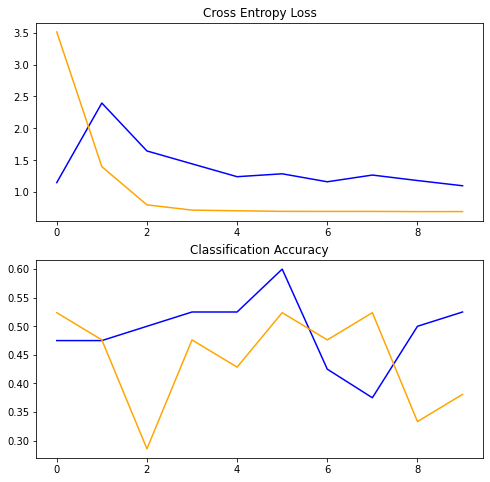

In [ ]:

# plot diagnostic learning curves

def summarize_diagnostics(history):
	# plot loss
  plt.figure(figsize=(8,8))
  plt.subplot(211)
  plt.title('Cross Entropy Loss')
  plt.plot(history.history['loss'], color='blue', label='train')
  plt.plot(history.history['val_loss'], color='orange', label='test')
	# plot accuracy
  plt.subplot(212)
  plt.title('Classification Accuracy')
  plt.plot(history.history['accuracy'], color='blue', label='train')
  plt.plot(history.history['val_accuracy'], color='orange', label='test')

# learning curves
summarize_diagnostics(history)

In [125]:
def predictImage(filename):
    img1 = image.load_img(filename,target_size=(200,200,3))
    
    plt.imshow(img1)
 
    img1= image.img_to_array(img1)
    img1=np.expand_dims(img1,axis=0)
    img1=np.array(img1)
    img1=img1/255
    
    val = grid_result.predict(img1)
    #print(grid_result.predict([img1]))
    print(val)
    if val.any() == 1:
      
        
      plt.xlabel("DOG",fontsize=30)
        
    
    elif val.any() == 0:
  
        
      plt.xlabel("CAT",fontsize=30)

    
    
    

[1.]


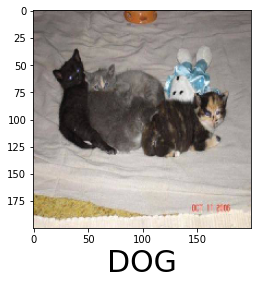

In [133]:
predictImage(r"/content/drive/My Drive/DL_projects/dataset/test_set/cats/cat.4050.jpg")

[1.]


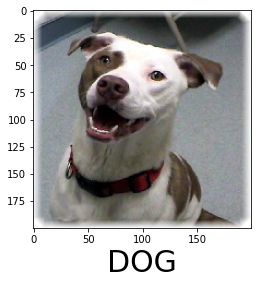

In [127]:
predictImage(r"/content/drive/My Drive/DL_projects/data/test/dogs/101.jpg")

[0.]


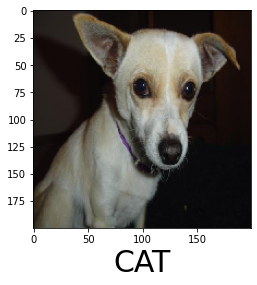

In [ ]:
predictImage("/content/drive/My Drive/DL_projects/data/test/dogs/104.jpg")

[0.]


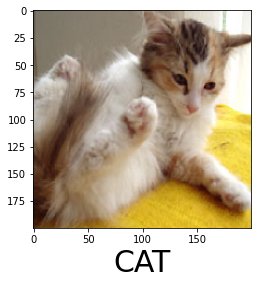

In [ ]:
predictImage('/content/drive/My Drive/DL_projects/data/test/cats/105.jpg')

[0.]


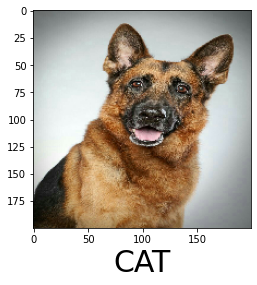

In [ ]:
predictImage('/content/drive/My Drive/DL_projects/data/test/dogs/german_101.jpg')

[0.]


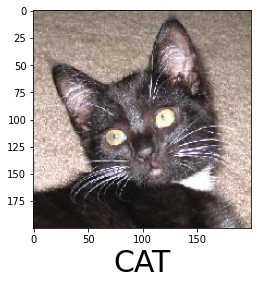

In [ ]:
predictImage('/content/drive/My Drive/DL_projects/data/test/cats/102.jpg')